In [2]:
from ckine.tensor_generation import findy, reduce_values
y_of_combinations, new_mat, mat, mats, cell_names = findy(2)

100%|██████████| 2176/2176 [00:02<00:00, 892.92it/s]


In [3]:
values = reduce_values(y_of_combinations)

In [4]:
from ckine.Tensor_analysis import perform_decomposition, plot_values_decomposition, plot_timepoint_decomp, plot_combo_decomp, plot_low_high
%matplotlib inline

#Actually Apply these functions and see the plots
factors = perform_decomposition(values , 6)

Using numpy backend.
Using numpy backend.


In [ ]:
plot_values_decomposition(factors,7,8);
plot_timepoint_decomp(factors,1,2);
plot_low_high(factors, new_mat, 1, 2);
plot_combo_decomp(factors,mat, 1,2,cell_names);

In [ ]:
from ckine.Tensor_analysis import plot_R2X
plot_R2X(values, 9)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(1,8):
    plot_timepoint_decomp(factors,i,i+1);

IndexError: index 6 is out of bounds for axis 1 with size 6

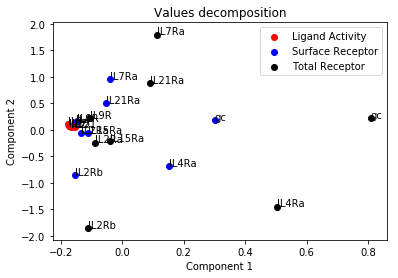

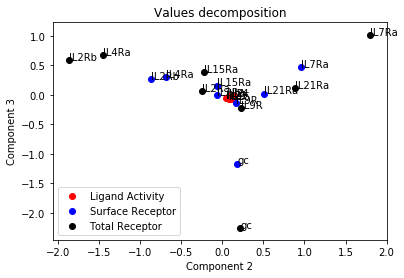

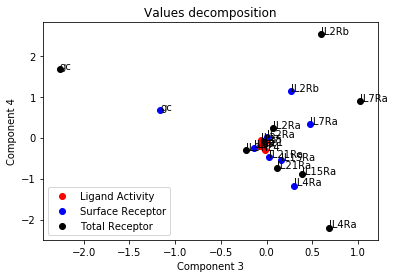

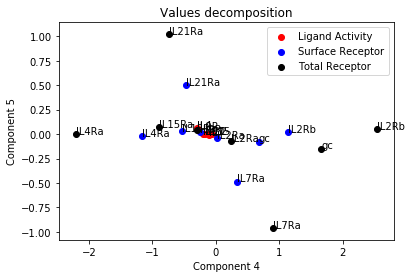

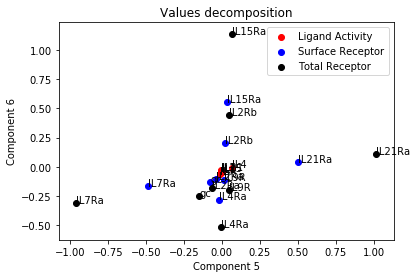

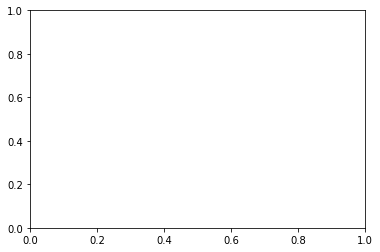

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(1,8):
    plot_values_decomposition(factors,i,i+1);

In [ ]:
from ckine.Tensor_analysis import calculate_correlation
dz = calculate_correlation(values,mats,8)

In [ ]:
dz